In [1]:
#2022-03-23 머신러닝 5회차

In [3]:
#훈련/테스트 데이터셋 분할하기
import numpy as np
from sklearn.model_selection import train_test_split

X,y=np.arange(10).reshape((5,2)),range(5)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [4]:
#평균제곱근 오차(RMSE) 구하기
from sklearn.metrics import mean_squared_error
y_true=[3,-0.5,2,7]
y_pred=[2.5,0.0,2,8]
mean_squared_error(y_true,y_pred)

0.375

In [7]:
#결정계수 구하기
from sklearn.metrics import r2_score
y_true=[3,-0.5,2,7]
y_pred=[2.5,0.0,2,8]

r2_score(y_true,y_pred)

0.9486081370449679

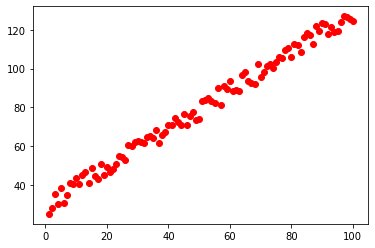

In [13]:
#경사 하강법 선형회귀로 구현하기
import matplotlib.pyplot as plt
import numpy as np
import random

def gen_data(numPoints,bias,variance):
    x=np.zeros(shape=(numPoints,2))
    y=np.zeros(shape=numPoints)
    
    for i in range(0,numPoints):
        x[i][0]=1 #데이터 x의 상수항에는 1
        x[i][1]=i #데이터의 x값은 1씩 증가
        y[i]=(i+bias)+random.uniform(0,1)*variance #데이터 y에 bias 생성
    return x,y
x,y=gen_data(100,25,10) #100개 데이터 생성
plt.plot(x[:,1]+1,y,"ro")
plt.show()

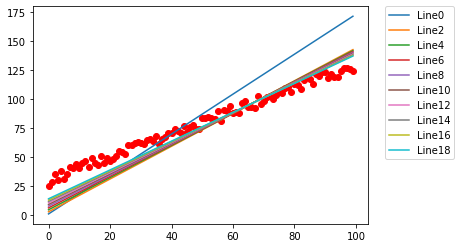

In [18]:
#생성된 데이터에 경사하강법 적용시키기
def gradient_descent(x,y,theta,alpha,m,numlterations):
    xTrans=x.transpose()
    theta_list=[]
    cost_list=[]
    for i in range(0,numlterations):
        hypothesis=np.dot(x,theta)
        loss=hypothesis-y
        cost=np.sum(loss**2)/(2*m)
        gradient=np.dot(xTrans,loss)/m
        theta=theta-alpha*gradient
        if i%250==0:
            theta_list.append(theta)
            cost_list.append(cost)
    return theta,np.array(theta_list),cost_list
m,n=np.shape(x)
numlterations=5000
alpha=0.0005
theta=np.ones(n)

theta,theta_list,cost_list=gradient_descent(x,y,theta,alpha,m,numlterations)

y_predict_step=np.dot(x,theta_list.transpose())
plt.plot(x[:,1],y,"ro")
for i in range(0,20,2):
    plt.plot(x[:,1],y_predict_step[:,i],label='Line%d'%i)
    
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

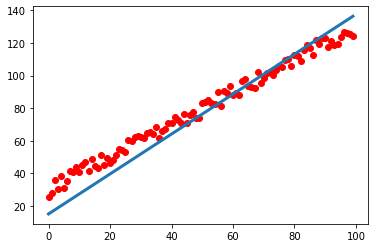

In [19]:
y_predict=np.dot(x,theta)
plt.plot(x[:,1],y,'ro')
plt.plot(x[:,1],y_predict,lw=3)
plt.show()

In [ ]:
#SGD 파이썬 코드 작성하기
class LinearRegressionGD(object):
    def__init__(self,fit_intercept=True,
                copy_X=True,eta0=0.001,
                epochs=1000,batch_size=1,
                weight_decay=0.9,
                shuffle=True):
        